In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Load and prepare the dataset

## Load the dataset

If you want to run this notebook, you need to download the dataset here: [https://archive.ics.uci.edu/ml/datasets/Parkinsons](https://archive.ics.uci.edu/ml/datasets/Parkinsons)

In [2]:
df_data = pd.read_csv('..\data\parkinsons.csv')

In [3]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [4]:
df_data.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
print("The number of 0s in staus",df_data[df_data.status==0].shape[0])
print("The number of 1s in status",df_data[df_data.status==1].shape[0])

The number of 0s in staus 48
The number of 1s in status 147


## Drop the name column

In [6]:
df_data.drop(['name'], axis=1, inplace=True)

## Create a DataFrame named X containing all the columns except the status, create a DataFrame named y containing the status.

In [7]:
X = df_data.drop(['status'], axis=1)
y = df_data['status']

## Split the dataset into a training set and a test set

## Standardize X

Standardizing made my accuracy worse?


In [8]:
scaler = StandardScaler()

In [9]:
X_scaled = scaler.fit_transform(X)

## Split X and y into training and test sets

In [18]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=675)

# Create the model

In [19]:
solver = LogisticRegression(solver='lbfgs', penalty='none', max_iter=5000)

In [20]:
solver.fit(X_train, y_train)

LogisticRegression(max_iter=5000, penalty='none')

# Calculate accuracy

In [21]:
score = solver.score(X_test,y_test)
score

0.8571428571428571

# L2 regularization with c values from 0.05 to 1.5 in incriments of 0.05

In [22]:
# what about validation splits?
train_accuracy = []
test_accuracy = []
c_values = [0.05 + 0.05 * i for i in range(30)]
for c in c_values:
    solver = LogisticRegression(solver='lbfgs',penalty='l2',C=c,max_iter=5000)
    solver.fit(X_train,y_train)
    train_accuracy.append(solver.score(X_train,y_train))
    test_accuracy.append(solver.score(X_test,y_test))
accuracy_data = pd.DataFrame({'C':c_values,'Training_Set_Accuracy':train_accuracy,'Test_Set_Accuracy':test_accuracy})

In [23]:
accuracy_data

,C,Training_Set_Accuracy,Test_Set_Accuracy
0,0.05,0.856164,0.816327
1,0.10,0.869863,0.816327
2,0.15,0.869863,0.816327
3,0.20,0.869863,0.816327
4,0.25,0.883562,0.836735
5,0.30,0.876712,0.836735
6,0.35,0.876712,0.836735
7,0.40,0.876712,0.836735
8,0.45,0.876712,0.836735
9,0.50,0.876712,0.836735


In [26]:
accuracy_data['Accuracy_Difference'] = np.abs(accuracy_data.Training_Set_Accuracy - accuracy_data.Test_Set_Accuracy)

In [28]:
accuracy_data

,C,Training_Set_Accuracy,Test_Set_Accuracy,Accuracy_Difference
0,0.05,0.856164,0.816327,0.039838
1,0.10,0.869863,0.816327,0.053536
2,0.15,0.869863,0.816327,0.053536
3,0.20,0.869863,0.816327,0.053536
4,0.25,0.883562,0.836735,0.046827
5,0.30,0.876712,0.836735,0.039978
6,0.35,0.876712,0.836735,0.039978
7,0.40,0.876712,0.836735,0.039978
8,0.45,0.876712,0.836735,0.039978
9,0.50,0.876712,0.836735,0.039978


In [27]:
accuracy_data[accuracy_data.Accuracy_Difference == accuracy_data.Accuracy_Difference.min()]['C']

0    0.05
Name: C, dtype: float64

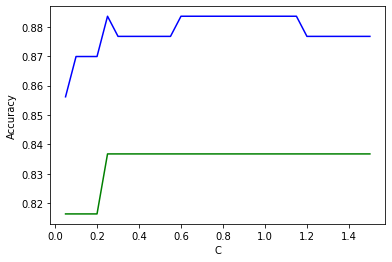

In [34]:
fig = plt.figure()
plt1 = fig.add_subplot(1,1,1)
plt1.plot('C','Training_Set_Accuracy',data=accuracy_data,color='blue',label='Training Accuracy')
plt1.plot('C','Test_Set_Accuracy',data=accuracy_data,color='green',label='Test Set Accuracy')
plt1.set(xlabel='C', ylabel='Accuracy')
plt.show()